## <font size=5> <strong>Heart Disease Prediction by Kuldeep Sharma
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
dataset.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<b>Luckily, we have no missing values</b>

#### Let's understand our columns better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [11]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


<H4>This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.</H4>

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


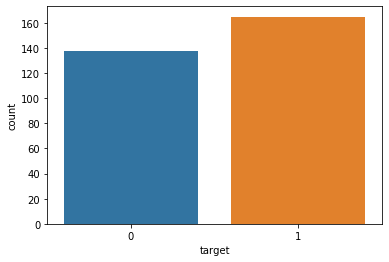

In [12]:
y = dataset["target"]

sns.countplot(y)
target_temp = dataset.target.value_counts()

print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [14]:
dataset["sex"].unique()


array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

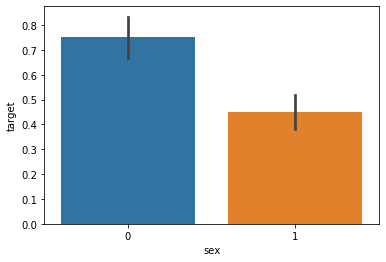

In [15]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [16]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

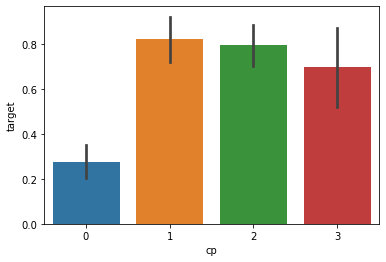

In [17]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [18]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [19]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

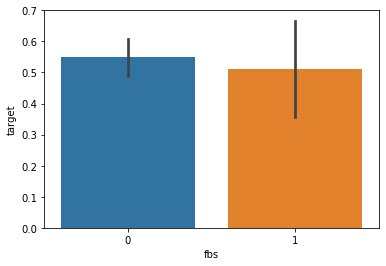

In [20]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [21]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

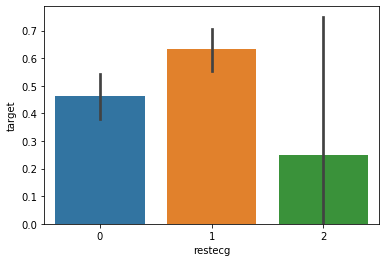

In [22]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [23]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

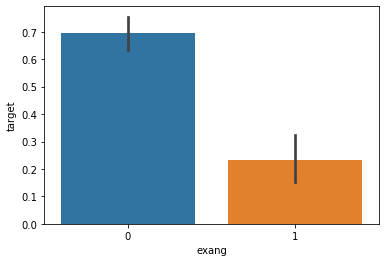

In [24]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [25]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

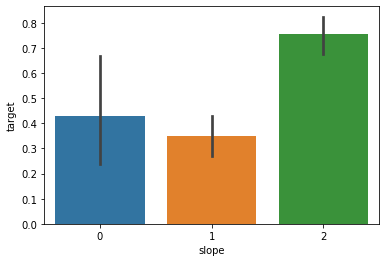

In [26]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

### <b>number of major vessels (0-3) colored by flourosopy

In [27]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

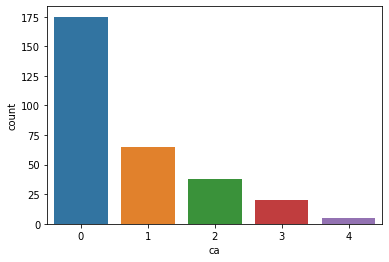

In [28]:
sns.countplot(dataset["ca"])

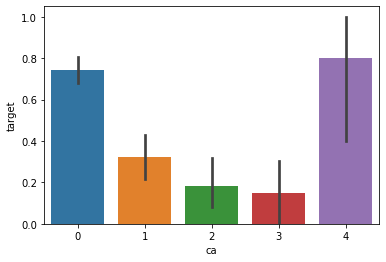

In [29]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [30]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

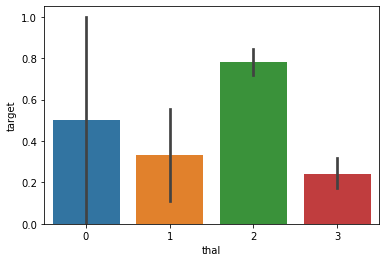

In [31]:
sns.barplot(dataset["thal"],y)

## IV. Train Test split

In [32]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [33]:
X_train.shape

(242, 13)

In [34]:
X_test.shape

(61, 13)

In [35]:
Y_train.shape

(242,)

In [37]:
Y_test.shape

(61,)

## V. Model Fitting

In [38]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [41]:
Y_pred_lr.shape

(61,)

In [42]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)


In [44]:
Y_pred_nb.shape

(61,)

In [45]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [46]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)


In [47]:
Y_pred_svm.shape

(61,)

In [48]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### Gradient Boost 

In [49]:
 from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=100)
gb_model.fit(X_train, Y_train)

Y_pred_gb = gb_model.predict(X_test)

In [50]:
Y_pred_gb.shape

(61,)

In [51]:
score_gb = round(accuracy_score(Y_pred_gb,Y_test)*100,2)

print("The accuracy score achieved using GBoost Tree is: "+str(score_gb)+" %")

The accuracy score achieved using GBoost Tree is: 80.33 %


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [53]:
print(Y_pred_dt.shape)

(61,)


In [54]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [56]:
Y_pred_rf.shape

(61,)

In [57]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


## VI. Output final score

In [58]:
scores = [score_lr,score_nb,score_svm,score_gb,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","GBoost Tree","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using GBoost Tree is: 80.33 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %


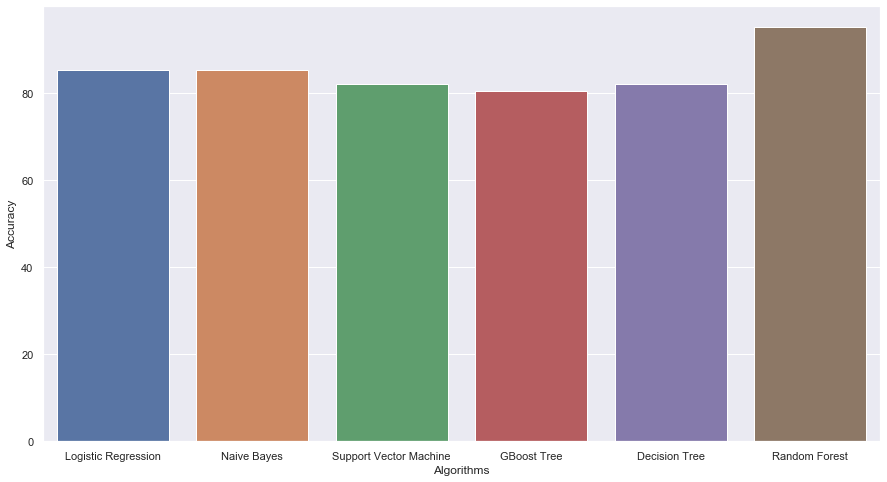

In [59]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

sns.barplot(algorithms,scores)

### Random Forest has good result as compare to other algorithms <br> <br>